In [3]:
from __future__ import absolute_import, division, print_function
import tensorflow as tf
from tensorflow import keras

import numpy as np
import itertools

print(tf.__version__)

1.12.0


In [4]:
imdb = keras. datasets. imdb
(training_data, training_label), (test_data, test_label) = imdb.load_data(num_words=10000)
#The IMDB dataset comes packaged with TensorFlow. It has already been preprocessed such that the reviews 
#(sequences of words) have been converted to sequences of integers, where each integer represents a 
#specific word in a dictionary.


In [5]:
print("Training entries : {}, labels: {}".format(len(training_data), len(training_data)))

Training entries : 25000, labels: 25000


In [6]:
#Let's test how review looks like in this processed data
print(training_data[0])

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]


In [7]:
print(len(training_data[0]), len(training_data[20]))

218 129


In [8]:
temp = imdb.get_word_index()
for key,value in list(temp.items())[0:1000]:
    if temp[key] < 2000:
        print(key, value)

woods 1408
wooden 1636
kids 359
want 178
wrong 352
fit 1180
screaming 1927
effects 299
purpose 1285
needed 884
master 1297
feeling 544
cinematic 1357
saying 657
nicely 1777
lots 772
nature 873
much 73
had 66
has 44
bottom 1321
starring 1181
minute 783
following 1042
jim 1237
seriously 612


In [9]:
word_index = imdb.get_word_index()
#let's reserve first 3 indices for dealing with NL stuff

word_index = {key:(value+3) for key,value in word_index.items()}
word_index["<PAD>"] = 0
word_index["<START>"] = 1
word_index["<UNKNOWN>"] = 2
word_index["<UNUSED>"] = 3

reverse_word_index = dict([(value, key) for key,value in word_index.items()])

def decode_text_from_intarr(integerText):
    return ' '.join(reverse_word_index.get(i, '?') for i in integerText)

In [10]:
decode_text_from_intarr(training_data[1])

"<START> big hair big boobs bad music and a giant safety pin these are the words to best describe this terrible movie i love cheesy horror movies and i've seen hundreds but this had got to be on of the worst ever made the plot is paper thin and ridiculous the acting is an abomination the script is completely laughable the best is the end showdown with the cop and how he worked out who the killer is it's just so damn terribly written the clothes are sickening and funny in equal <UNKNOWN> the hair is big lots of boobs <UNKNOWN> men wear those cut <UNKNOWN> shirts that show off their <UNKNOWN> sickening that men actually wore them and the music is just <UNKNOWN> trash that plays over and over again in almost every scene there is trashy music boobs and <UNKNOWN> taking away bodies and the gym still doesn't close for <UNKNOWN> all joking aside this is a truly bad film whose only charm is to look back on the disaster that was the 80's and have a good old laugh at how bad everything was back 

In [11]:
training_data = keras.preprocessing.sequence.pad_sequences(training_data, value=word_index["<PAD>"],padding='post',maxlen=256)
test_data = keras.preprocessing.sequence.pad_sequences(test_data, value=word_index["<PAD>"],padding='post',maxlen=256)

In [12]:
print(len(training_data[0]), len(training_data[0]))

256 256


In [13]:
vocab_size = 10000
model = keras.Sequential()
model.add(keras.layers.Embedding(vocab_size, 16))
model.add(keras.layers.GlobalAveragePooling1D())
model.add(keras.layers.Dense(16,activation=tf.nn.relu))
model.add(keras.layers.Dense(1, activation=tf.nn.sigmoid))

print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 16)          160000    
_________________________________________________________________
global_average_pooling1d (Gl (None, 16)                0         
_________________________________________________________________
dense (Dense)                (None, 16)                272       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 17        
Total params: 160,289
Trainable params: 160,289
Non-trainable params: 0
_________________________________________________________________
None


In [14]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])

In [15]:
x_val = training_data[:10000]
partial_x_train = training_data[10000:]

y_val = training_label[:10000]
partial_y_train = training_label[10000:]

In [16]:
training_details = model.fit(partial_x_train, partial_y_train,epochs=40, batch_size=512, validation_data=(x_val, y_val), verbose=1)

C:\Users\ksrat\Anaconda3\lib\site-packages\tensorflow\python\ops\gradients_impl.py:112: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 15000 samples, validate on 10000 samples
Epoch 1/40
15000/15000 [==============================] - 1s 77us/step - loss: 0.6921 - acc: 0.5723 - val_loss: 0.6903 - val_acc: 0.6587
Epoch 2/40
15000/15000 [==============================] - 0s 33us/step - loss: 0.6866 - acc: 0.6891 - val_loss: 0.6825 - val_acc: 0.7446
Epoch 3/40
15000/15000 [==============================] - 1s 37us/step - loss: 0.6746 - acc: 0.7619 - val_loss: 0.6675 - val_acc: 0.7551
Epoch 4/40
15000/15000 [==============================] - 1s 35us/step - loss: 0.6533 - acc: 0.7706 - val_loss: 0.6437 - val_acc: 0.7613
Epoch 5/40
15000/15000 [==============================] - 0s 33us/step - loss: 0.6218 - acc: 0.7933 - val_loss: 0.6097 - val_acc: 0.7856
Epoch 6/40
15000/15000 [==============================] - 0s 33us/step - loss: 0.5817 - acc: 0.8107 - val_loss: 0.5704 - val_acc: 0.8012
Epoch 7/40
15000/15000 [==============================] - 1s 34us/step - loss: 0.5363 - acc: 0.8283 - val_loss: 0.5286 - val_acc

In [17]:
results = model.evaluate(test_data, test_label)
print(results)

25000/25000 [==============================] - 0s 19us/step
[0.32359304673194883, 0.87236]


In [18]:
history_dic = training_details.history
print(history_dic.keys())

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


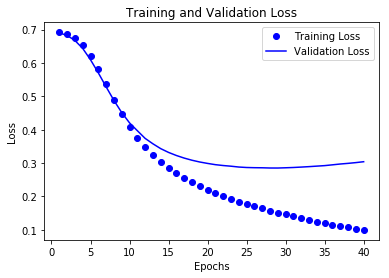

In [22]:
import matplotlib.pyplot as p
accuracy = history_dic['acc']
val_acc = history_dic['val_acc']
loss = history_dic['loss']
val_loss = history_dic['val_loss']

epochs = range(1,len(accuracy)+1)

# "bo" is for "blue dot"
p.plot(epochs, loss, 'bo', label='Training Loss')
#b is for solid blue line
p.plot(epochs, val_loss, 'b', label='Validation Loss')
p.title('Training and Validation Loss')
p.xlabel('Epochs')
p.ylabel('Loss')
p.legend()
p.show()

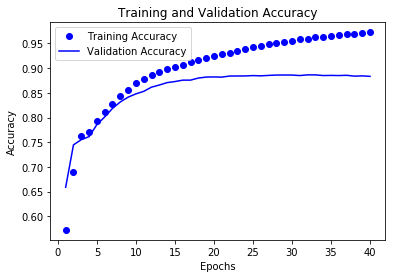

In [24]:
p.clf()

p.plot(epochs, accuracy, 'bo', label='Training Accuracy')
#b is for solid blue line
p.plot(epochs, val_acc, 'b', label='Validation Accuracy')
p.title('Training and Validation Accuracy')
p.xlabel('Epochs')
p.ylabel('Accuracy')
p.legend()
p.show()